In [8]:
# 処理用のコンフィグを設定

config = {
    'batch_size': 16,
    'dataset': 'dsb2018_96',
    'img_ext': '.png',
    'mask_ext': '.png',
    'num_classes': 1,
    'num_workers': 4
}

## パスを読み出し

In [9]:
import os
import sys
sys.path.append(".")
sys.path.append("..")
from src.config.config import cfg

In [10]:
from glob import glob
# 画像パスを訓練用とテスト用で分ける
from sklearn.model_selection import train_test_split

In [11]:
input_dir = cfg.DSB2018_96_DIR
img_ids = glob(os.path.join(input_dir, 'images', '*' + config['img_ext']))
img_ids = [os.path.splitext(os.path.basename(p))[0] for p in img_ids]

train_img_ids, val_img_ids = train_test_split(img_ids, test_size=0.2, random_state=41)

In [12]:
for i in range(10):
    print(train_img_ids[i])

853a4c67900c411abd04467f7bc7813d3c58a5f565c8b0807e13c6e6dea21344
d2815f2f616d92be35c7e8dcfe592deec88516aef9ffc9b21257f52b7d6d0354
10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28
ce88df7356d9d4a8d5944a93768f4c4b593de2d35616f7448c2b37b9fd60dd1f
a02ec007ae8feddb758078b1dfb8010c26886fd3c8babdc308ead8b4a63acbdb
ff3407842ada5bc18be79ae453e5bdaa1b68afc842fc22fa618ac6e6599d0bb3
d751ccb64fa767a65a966061218438bd1860695d96bbef11fdb2f0d3b8dedba8
edd36ed822e7ed760ff73e0524df22aa5bf5c565efcdc6c39603239c0896e7a8
514ccfc78cb55988a238d3ac9dc83460aa88382c95d56bcc0559962d9fe481ef
84eeec681987753029eb83ea5f3ff7e8b5697783cdb2035f2882d40c9a3f1029


## パスから画像を読み出し

In [16]:
import cv2

In [17]:
img_ids = train_img_ids
img_dir = os.path.join(input_dir, 'images')
mask_dir = os.path.join(input_dir, 'masks')
img_ext = config['img_ext']

In [21]:
idx = 1

img_id = img_ids[idx]
# オリジナル画像を読み出し
img = cv2.imread(os.path.join(img_dir, img_id+img_ext))

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

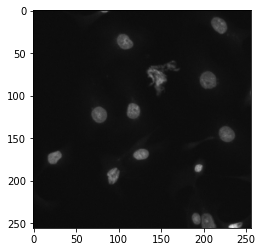

In [44]:
plt.imshow(img, cmap='gray') # 画像の貼り付け
plt.show() # 画像を表示

## 画像に合うマスク画像を読み出し

In [31]:
import numpy as np

In [37]:
mask_ext = config['mask_ext']
num_classes=config['num_classes']

In [32]:
mask = []

for i in range(num_classes):
    mask.append(cv2.imread(os.path.join(mask_dir, str(i), img_id + mask_ext), cv2.IMREAD_GRAYSCALE)[..., None])

mask = np.dstack(mask)

In [36]:
print(mask.shape)

(256, 256, 1)


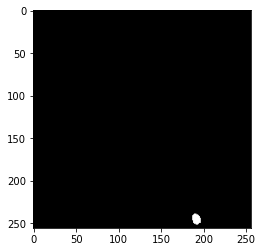

In [43]:
plt.imshow(mask, cmap='gray')
plt.show()

## マスク画像をもとの画像に重ね合わせる

In [39]:
# 逆マスクを作る
mask_inv = cv2.bitwise_not(mask)

In [42]:
print(mask_inv.shape)

(256, 256)


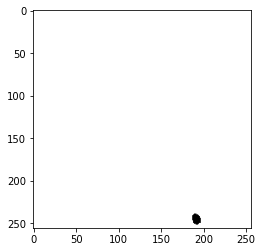

In [45]:
plt.imshow(mask_inv, cmap='gray')
plt.show()

In [52]:
# 元の画像にマスク画像を重ねた場合
fg = cv2.bitwise_or(img, img, mask=mask)

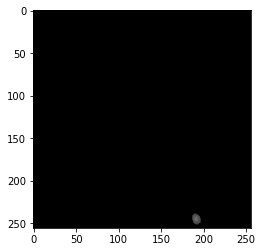

In [53]:
plt.imshow(fg)
plt.show()

In [54]:
# 元の画像に逆マスク画像を重ねた場合
fg_inv = cv2.bitwise_or(img, img, mask=mask_inv)

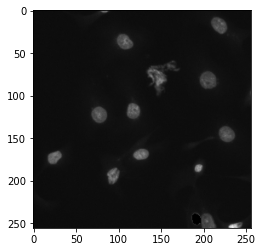

In [55]:
plt.imshow(fg_inv)
plt.show()